# Price forecasting with RFR+
data from [New York City Airbnb Open Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data "Kaggle.com")
>Good to see [Smart Pricing with XGB, RFR + Interpretations][1]  
>Easy to know how [Linear Regression NYCbnb][2]

[1]: https://www.kaggle.com/jrw2200/smart-pricing-with-xgb-rfr-interpretations/notebook?fbclid=IwAR1iKcgv4EH5XbyWpg0H13rT_y71-m1gbT4hinJojsdPWU2fGP0TA2zBpa8#2.-Models "Amazing model used"
[2]: https://www.kaggle.com/margesh/linear-regression-nycbnb?fbclid=IwAR3lBCAlA15lfgebxnFZBzvFq6fjJcH-Vps0Egz6brjQbqVXT9cYQCqWLfw "simple LinearRegression modle"

# Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image
Img = Image.open('New York City Airbnb Open Data/New_York_City_.png')
data = pd.read_csv('New York City Airbnb Open Data/AB_NYC_2019.csv')

pd.options.mode.chained_assignment = None

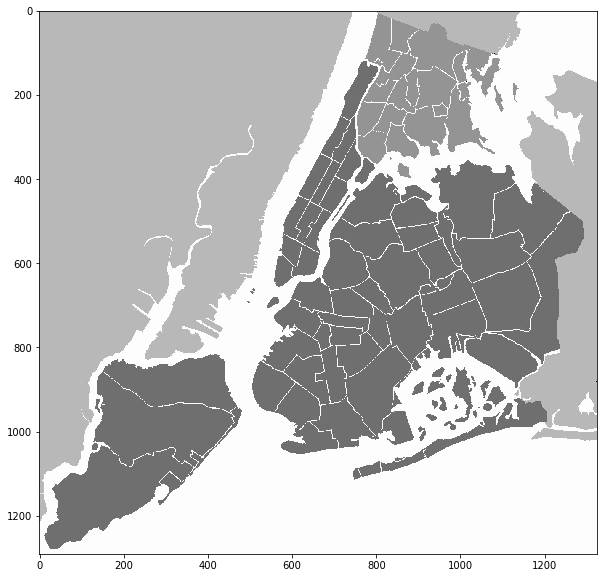

In [2]:
plt.figure(figsize=(10,10))
plt.imshow(Img)

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Preprocessing and EDA

In [6]:
lost = data.isnull().sum().sort_values(ascending=False)
pd.DataFrame(lost, columns=['lost_data'])

,lost_data
reviews_per_month,10052
last_review,10052
host_name,21
name,16
availability_365,0
calculated_host_listings_count,0
number_of_reviews,0
minimum_nights,0
price,0
room_type,0


In [7]:
df = data[['number_of_reviews', 'last_review', 'reviews_per_month']]
df[df['last_review'].isnull()].tail()

,number_of_reviews,last_review,reviews_per_month
48890,0,NaN,NaN
48891,0,NaN,NaN
48892,0,NaN,NaN
48893,0,NaN,NaN
48894,0,NaN,NaN


We can see the NaN values in columns **\[last_review\]** and **\[reviews_per_month\]** because of there's no review in it.  
So I fill those values with 0.

In [8]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data['last_review'] = data['last_review'].fillna('no_review')

In [9]:
df = data[['name', 'host_id', 'host_name']]
df[df['name'].isnull()]

,name,host_id,host_name
2854,NaN,6676776,Peter
3703,NaN,11395220,Anna
5775,NaN,20700823,Jesse
5975,NaN,22686810,Michaël
6269,NaN,21600904,Lucie
6567,NaN,1832442,Carolina
6605,NaN,24625694,Josh
8841,NaN,31147528,Huei-Yin
11963,NaN,33377685,Jonathan
12824,NaN,50448556,Miguel


In [10]:
num = df[df['host_name'].isnull()].index
df.loc[num]

,name,host_id,host_name
360,Bienvenue,526653,NaN
2700,Cozy Studio in Flatbush,7779204,NaN
5745,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN
6075,Charming Room in Prospect Heights!,23077718,NaN
6582,"Luxurious, best location, spa inc'l",24576978,NaN
8163,Modern Quiet Gem Near All,32722063,NaN
8257,"Sunny, Private room in Bushwick",33134899,NaN
8852,R&S Modern Spacious Hideaway,32722063,NaN
9138,1 Bedroom in Prime Williamsburg,5162530,NaN
9817,Sunny Room in Harlem,39608626,NaN


Luckly the NAN in **\[name\]** and **\[host_name\]** are different from each rows.  
Also the **\[host_id\]** which **\[host_name\]** is NAN are all one-to-one.  

The amount of both are not so many.  
So if the feature is not important, ofcourse we drop the columns.But if the feature is useful, it's fine to drop the rows of datas or fill anything in them.

I'd like to fill them first.

In [11]:
for n in num:
    data['host_name'][n] = 'NoHostName_'+str(n)
    
num2 = df[df['name'].isnull()].index
for n in num2:
    data['name'][n] = 'NoName_'+str(n)

In [12]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

----

#### `'price'`

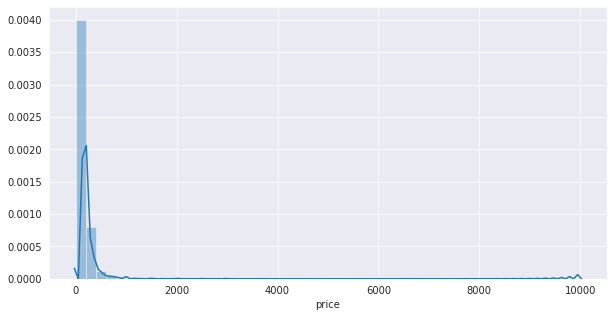

In [13]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10,5))
    sns.distplot(data['price'], )

Since the distribution has skew too much. Try log transformation will be better for training our model after.  
( There's zero values in the target, so use log(1+x). )  
Also notice `describe` about price we need to remove outlier for it.

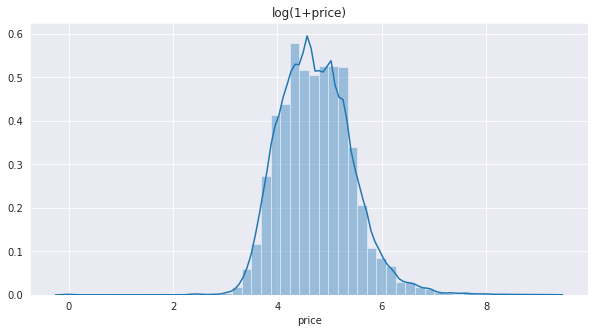

In [14]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10,5))
    sns.distplot(np.log1p(data['price']))
    plt.title('log(1+price)')

In [15]:
print('Shape Of Before Outliers: ',data.shape)
data = data[np.abs(data['price']-data['price'].mean()) <= (3*data['price'].std())]
print('Shap Of After Outliers: ',data.shape)

Shape Of Before Outliers:  (48895, 16)
Shap Of After Outliers:  (48507, 16)


In [16]:
# data['price'] = np.log1p(data['price'])
# It's better to do it later for painting the guide map. (['latitude'] and ['longitude'] need it keep the values.)

#### `'id'`  `'name'`  `'host_id'`  `'host_name'`

In [17]:
n = ['id', 'name', 'host_id', 'host_name']
for x in n:
    m = len(data[x].unique())
    print('The amount of {} unique : {}'.format(x, m))

The amount of id unique : 48507
The amount of name unique : 47539
The amount of host_id unique : 37179
The amount of host_name unique : 11406


In [18]:
data['host_id'].value_counts().head()

219517861    327
107434423    232
30283594     118
137358866    103
16098958      96
Name: host_id, dtype: int64

In [19]:
data[data['host_id'] == 7503643].sort_values(by=['host_name', 'neighbourhood_group'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2631,1390532,Amazing Designer Loft in BK Factory,7503643,Vida,Brooklyn,Greenpoint,40.72456,-73.94343,Entire home/apt,129,30,7,2019-03-27,0.11,52,189
2636,1392673,Spacious Factory Converted Loft,7503643,Vida,Brooklyn,Greenpoint,40.72756,-73.94230,Entire home/apt,129,30,6,2018-09-02,0.09,52,249
2708,1460017,Lovely Factory Loft in Greenpoint!,7503643,Vida,Brooklyn,Greenpoint,40.72732,-73.94076,Entire home/apt,129,30,6,2018-09-11,0.08,52,277
2749,1486099,All New Bohemian Chic 1BR Loft,7503643,Vida,Brooklyn,Greenpoint,40.72267,-73.94362,Entire home/apt,149,30,9,2018-02-18,0.13,52,343
2782,1524302,Huge 1 Bedroom Loft at Habitat 101!,7503643,Vida,Brooklyn,Greenpoint,40.72686,-73.94177,Entire home/apt,149,30,7,2018-10-31,0.11,52,281
2850,1613110,Sunny Studio Loft @ Habitat 101,7503643,Vida,Brooklyn,Greenpoint,40.72570,-73.94181,Entire home/apt,129,30,8,2019-01-30,0.12,52,344
2897,1656254,Habitat 101. Amazing 1br Loft Apartment,7503643,Vida,Brooklyn,Greenpoint,40.72531,-73.94222,Entire home/apt,149,30,9,2018-10-13,0.14,52,341
2995,1745430,Bohemian 2BR DuplexLoft in Brooklyn,7503643,Vida,Brooklyn,Greenpoint,40.72569,-73.94054,Entire home/apt,159,30,6,2019-06-10,0.10,52,310
3153,1878965,Gorgeous 2BR Flex Loft w/NYC views,7503643,Vida,Brooklyn,Greenpoint,40.72589,-73.94055,Entire home/apt,159,30,5,2019-01-01,0.07,52,346
3179,1896296,Modern Industrial 1br Loft w/City View,7503643,Vida,Brooklyn,Greenpoint,40.72749,-73.94201,Entire home/apt,149,30,7,2019-05-31,0.11,52,340


**id** and **name** is not useful for our model obviously.The number of **name** is too close with the total number, 
also I could not find the rule with them.

We can see the **host_id** is only for someone person. But there's too many people (who possibly have different activity) have the same name.  
Since **host_name** to **host_id** is not one-to-one, I'd like not to use this feature.  
Keeping **\[host_id\]** although I'm not sure to use it or not.

In [20]:
data = data.drop(['id', 'name', 'host_name'], 1)

In [21]:
data.shape

(48507, 13)

#### `'neighbourhood_group'`  `'neighbourhood'`  `'room_type'`

In [22]:
n = ['neighbourhood_group', 'neighbourhood']
for x in n:
    m = len(data[x].unique())
    print('The amount of {} unique : {}'.format(x, m))

The amount of neighbourhood_group unique : 5
The amount of neighbourhood unique : 221


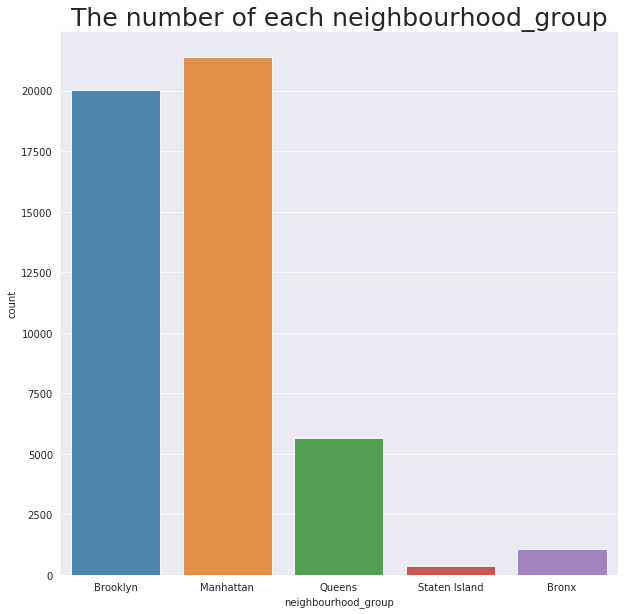

In [23]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10,10))
    sns.countplot(data['neighbourhood_group'], alpha=0.85)
    plt.title('The number of each neighbourhood_group', fontsize=25)

In [24]:
#a1 = pd.DataFrame(data['neighbourhood'].value_counts())
a2 = data[['neighbourhood', 'price']].groupby('neighbourhood').mean()
a3 = data[['neighbourhood', 'price']].groupby('neighbourhood').count()
a2.columns=['mean_price']
a3.columns=['count']
pd.concat([a3,a2], 1).sort_values(by='count', ascending=False).head(14)

,count,mean_price
neighbourhood,,
Williamsburg,3906,138.710189
Bedford-Stuyvesant,3700,100.441081
Harlem,2649,112.734617
Bushwick,2462,83.319659
Hell's Kitchen,1943,193.796191
Upper West Side,1933,171.888257
East Village,1838,172.453754
Upper East Side,1776,168.312500
Crown Heights,1560,108.233974


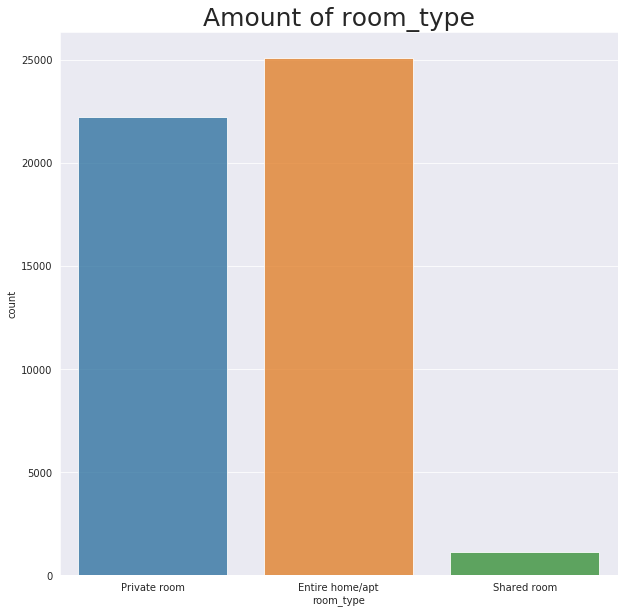

In [25]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10,10))
    sns.countplot(data['room_type'], alpha=0.8)
    plt.title('Amount of room_type', fontsize=25)

In [26]:
data.groupby('room_type')['price'].mean()

room_type
Entire home/apt    191.036611
Private room        83.531709
Shared room         66.001730
Name: price, dtype: float64

In [27]:
df = data.pivot_table('price', index='neighbourhood_group',
                       columns='room_type', aggfunc='count')
df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,378,651,60
Brooklyn,9498,10109,413
Manhattan,12966,7933,479
Queens,2087,3368,195
Staten Island,173,188,9


Text(0.5, 1.0, 'Room_type in neighbourhood_group')

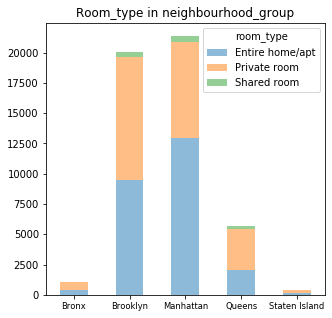

In [28]:
fig = plt.figure()
fig.set_size_inches(5,5)
ax = plt.subplot(111)
df.plot.bar(ax=ax, stacked=True, alpha=0.5)

labels = ax.set_xticklabels(df.index, rotation=0, fontsize='small')
ax.set_xlabel('')
ax.set_title('Room_type in neighbourhood_group')

#### `'latitude'`	 `'longitude'`

Let's see what we can do with our given **\[longitude\]** and **\[latitude\]**.

In [29]:
print(data['longitude'].min())
print(data['longitude'].max())
print(data['latitude'].min())
print(data['latitude'].max())

-74.24441999999999
-73.71299
40.499790000000004
40.913059999999994


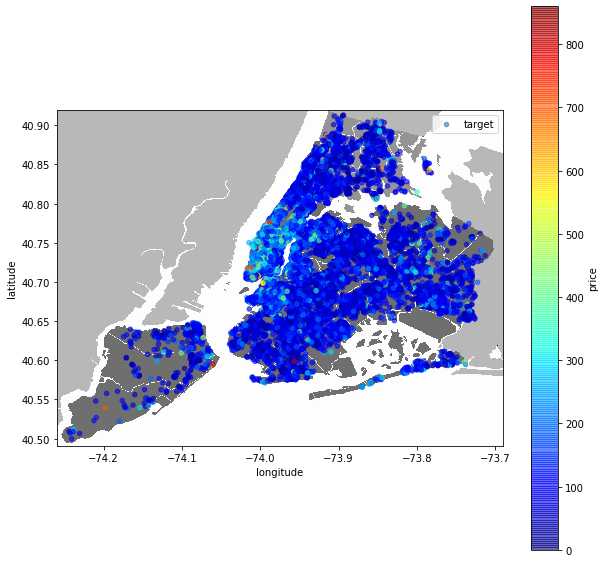

In [30]:
plt.figure(figsize=(10,10))
pic = plt.imread('New York City Airbnb Open Data/New_York_City_.png', 0)
plt.imshow(pic, zorder=0,extent=[-74.26, -73.69, 40.49, 40.92])

ax=plt.gca()
data.plot(kind='scatter', x='longitude', y='latitude', label='target',
          c='price', cmap=plt.get_cmap('jet'), colorbar=True,
          ax=ax, alpha=0.6, zorder=5)
plt.legend(loc='best')

In [31]:
data['price'] = np.log1p(data['price'])

#### `'minimum_nights'`

In [32]:
data[['minimum_nights']].describe()

,minimum_nights
count,48507.000000
mean,6.979343
std,20.291333
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


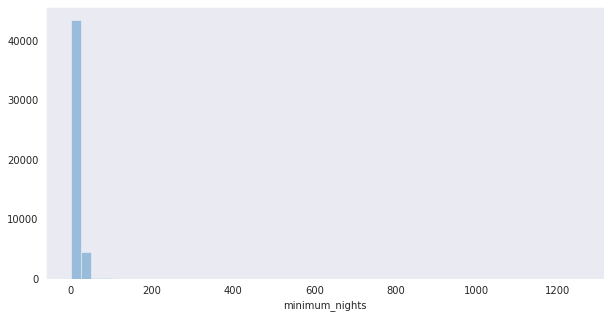

In [33]:
with sns.axes_style('dark'):
    plt.figure(figsize=(10,5))
    sns.distplot(data['minimum_nights'], kde=False)

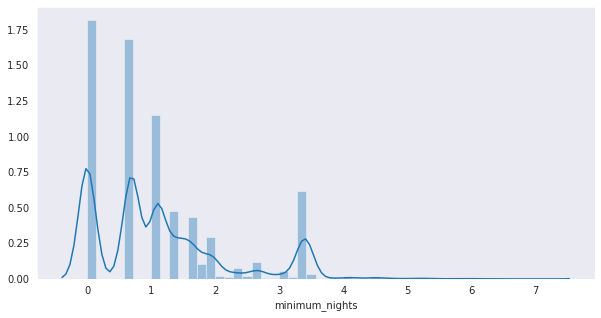

In [34]:
with sns.axes_style('dark'):
    plt.figure(figsize=(10,5))
    sns.distplot( np.log(data['minimum_nights']) )

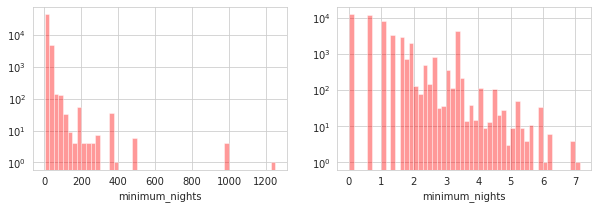

In [35]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    sns.distplot(data['minimum_nights'], kde=False, color='r', ax=axes[0])
    axes[0].set_yscale('log')
    
    sns.distplot(np.log(data['minimum_nights']) , kde=False, color='r', ax=axes[1])
    axes[1].set_yscale('log')

In [36]:
# data['minimum_nights'] = np.log(data['minimum_nights'])
# Since the distribution is too terrible to use,
# I was trying forecast with transforming or droping, and it's better to keep the origin type.

#### `'number_of_reviews'`  `'last_review'`  `'reviews_pre_month'`

In [37]:
data[['number_of_reviews', 'last_review', 'reviews_per_month']].sort_values(by='number_of_reviews', ascending=False).head(3)

,number_of_reviews,last_review,reviews_per_month
11759,629,2019-07-05,14.58
2031,607,2019-06-21,7.75
2030,597,2019-06-23,7.72


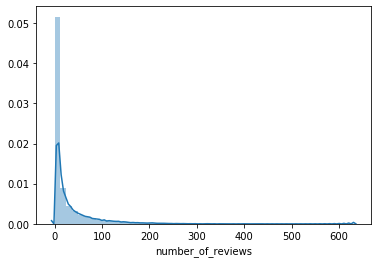

In [38]:
sns.distplot(data['number_of_reviews'])

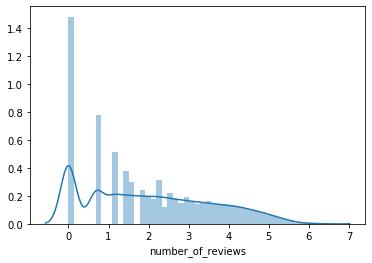

In [39]:
sns.distplot(np.log1p(data['number_of_reviews']) )

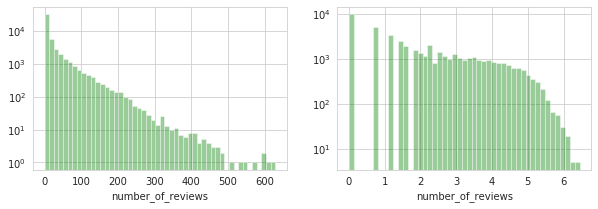

In [40]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    sns.distplot(data['number_of_reviews'], kde=False, color='g', ax=axes[0])
    axes[0].set_yscale('log')
    
    sns.distplot(np.log1p(data['number_of_reviews']) , kde=False, color='g', ax=axes[1])
    axes[1].set_yscale('log')

In [41]:
data['number_of_reviews'] = np.log1p(data['number_of_reviews'])

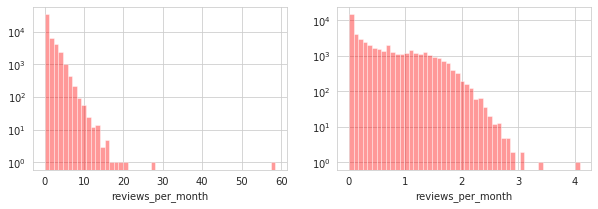

In [42]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    sns.distplot(data['reviews_per_month'], kde=False, color='r', ax=axes[0])
    axes[0].set_yscale('log')
    
    sns.distplot(np.log1p(data['reviews_per_month']) , kde=False, color='r', ax=axes[1])
    axes[1].set_yscale('log')

In [43]:
data['reviews_per_month'] = np.log1p(data['reviews_per_month'])

In [44]:
data['last_review'] = data['last_review'].astype('category').cat.codes
data['last_review'].head(3)

0    1499
1    1713
2    1762
Name: last_review, dtype: int16

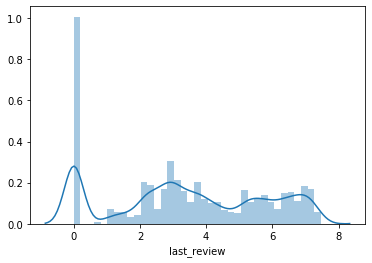

In [45]:
data['last_review'] = data['last_review'].apply(lambda x : -x+1762 )
sns.distplot(np.log1p(data['last_review']) )

Afer training test, it is completely no effect to target.

In [46]:
data = data.drop('last_review', 1)

#### `'calculated_host_listings_count'`

It's just the number of how many rows the **host_id** have. So, since their attribute are similar.  

In [47]:
data = data.drop('calculated_host_listings_count', 1)

#### `'availability_365'`

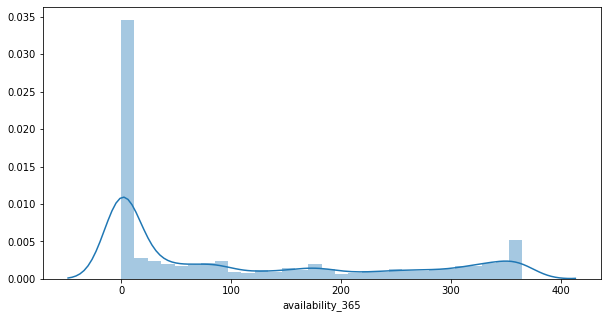

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(data['availability_365'])

In [49]:
# plt.figure(figsize=(20,20))
# plt.scatter(data['availability_365'], np.exp(data['price']), alpha=0.7)
# It's hardly to infer with this plot.

## correlation

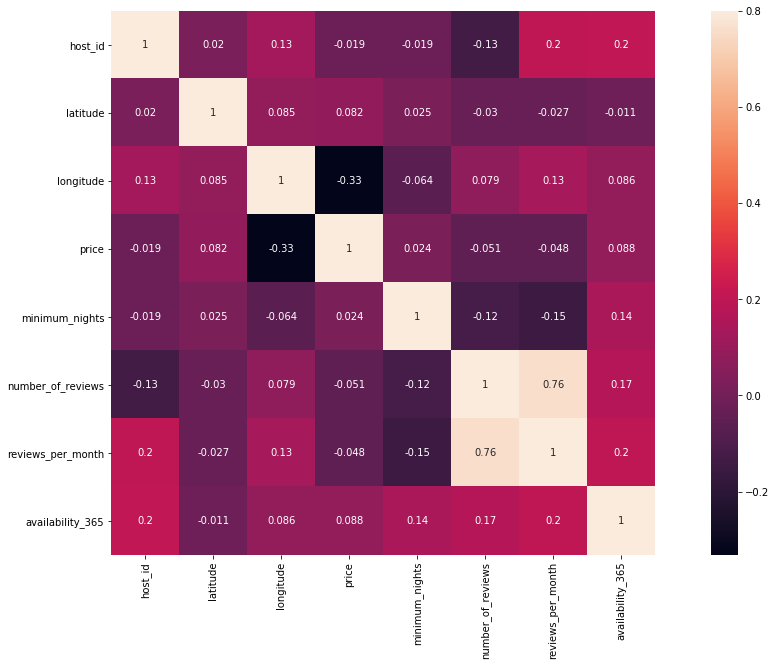

In [50]:
corrmat = data.corr()
f, ax =plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=True)

In [51]:
corrmat['price'].sort_values(ascending=False).drop('price')

availability_365     0.087685
latitude             0.082036
minimum_nights       0.023679
host_id             -0.019052
reviews_per_month   -0.048488
number_of_reviews   -0.050908
longitude           -0.331087
Name: price, dtype: float64

In [52]:
pd.get_dummies(data['neighbourhood'], prefix='neighbourhood').head()

one_hot = pd.get_dummies(data['neighbourhood_group'], prefix='neighbourhood_group')
data = data.drop('neighbourhood_group', 1)
data = pd.concat([data,one_hot], 1)

one_hot = pd.get_dummies(data['room_type'], prefix='room_type')
data = data.drop('room_type', 1)
data = pd.concat([data,one_hot], 1)

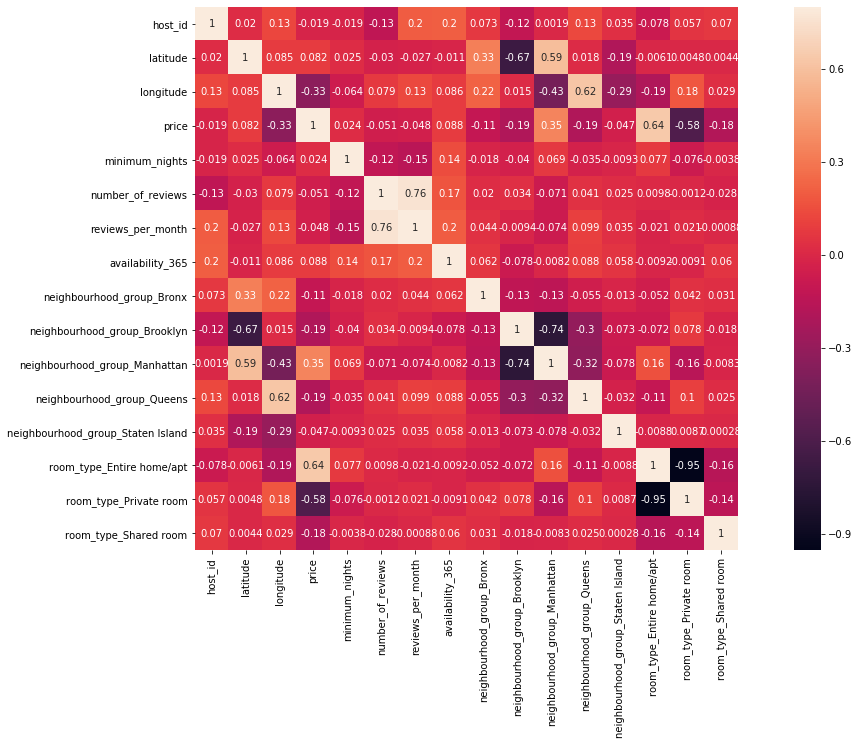

In [53]:
corrmat = data.corr()
f, ax =plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=True)

In [54]:
one_hot = pd.get_dummies(data['neighbourhood'], prefix='neighbourhood')
data = data.drop('neighbourhood', 1)
data = pd.concat([data,one_hot], 1)

In [55]:
data.shape

(48507, 237)

In [56]:
#使用的欄位總覽
a = list(data.columns)
a.remove('price')

In [57]:
#切分train與test組 7:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[a], data['price'], test_size=0.3, random_state=0)

In [58]:
print(y_train.shape)
print(y_test.shape)

(33954,)
(14553,)


In [59]:
#特徵縮放
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Model

In [60]:
#Sine 0 value, let the distribution move with (x+1)
def mean_absolute_percentage_error(true, pred):
    true, pred = np.array(true+1), np.array(pred+1)
    return np.mean(np.abs((true - pred) / true)) * 100

### RandomForestRegressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=1000, random_state=42)
rfModel.fit(x_train, y_train)

preds1 = rfModel.predict(x_train)
preds2 = rfModel.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
pd.DataFrame({'Model':'Random Forest Regressor',
              'train_RMSE':mean_squared_error(y_train, preds1),
              'test_RMSE':mean_squared_error(y_test, preds2),
              'train_MAPE':mean_absolute_percentage_error(y_train, preds1),
              'test_MAPE':mean_absolute_percentage_error(y_test, preds2),
              'train_r2_score':r2_score(y_train, preds1),
              'test_r2_score':r2_score(y_test, preds2)}, index=['result'])

,Model,train_RMSE,test_RMSE,train_MAPE,test_MAPE,train_r2_score,test_r2_score
result,Random Forest Regressor,0.021468,0.165249,1.906494,5.328559,0.949821,0.620577


In [63]:
y_test.index = np.arange(len(y_test))
pd.DataFrame({'preds':[ x-1 for x in np.exp(preds2)], 'true':[ x-1 for x in np.exp(y_test)]}).head(10)

,preds,true
0,88.695439,180.0
1,120.538856,130.0
2,84.111359,80.0
3,127.965037,125.0
4,57.580684,85.0
5,109.283996,120.0
6,72.874872,30.0
7,148.979254,165.0
8,80.239894,90.0
9,93.522248,99.0


----

### XGBRegressor

In [64]:
from xgboost import XGBRegressor
xgbModel = XGBRegressor(n_estimators=1000, learning_rate=0.08)
xgbModel.fit(x_train, y_train)

preds1 = xgbModel.predict(x_train)
preds2 = xgbModel.predict(x_test)

C:\Users\camer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:22:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
# from sklearn.metrics import mean_squared_error, r2_score
pd.DataFrame({'Model':'Random Forest Regressor',
              'train_RMSE':mean_squared_error(y_train, preds1),
              'test_RMSE':mean_squared_error(y_test, preds2),
              'train_MAPE':mean_absolute_percentage_error(y_train, preds1),
              'test_MAPE':mean_absolute_percentage_error(y_test, preds2),
              'train_r2_score':r2_score(y_train, preds1),
              'test_r2_score':r2_score(y_test, preds2)}, index=['result'])

,Model,train_RMSE,test_RMSE,train_MAPE,test_MAPE,train_r2_score,test_r2_score
result,Random Forest Regressor,0.142908,0.166778,4.988564,5.39897,0.665968,0.617067


In [66]:
y_test.index = np.arange(len(y_test))
pd.DataFrame({'preds':[ x-1 for x in np.exp(preds2)], 'true':[ x-1 for x in np.exp(y_test)]}).head(10)

,preds,true
0,87.311615,180.0
1,114.910973,130.0
2,89.464081,80.0
3,130.934753,125.0
4,46.257893,85.0
5,123.007561,120.0
6,66.262115,30.0
7,149.346451,165.0
8,60.851173,90.0
9,89.633163,99.0
